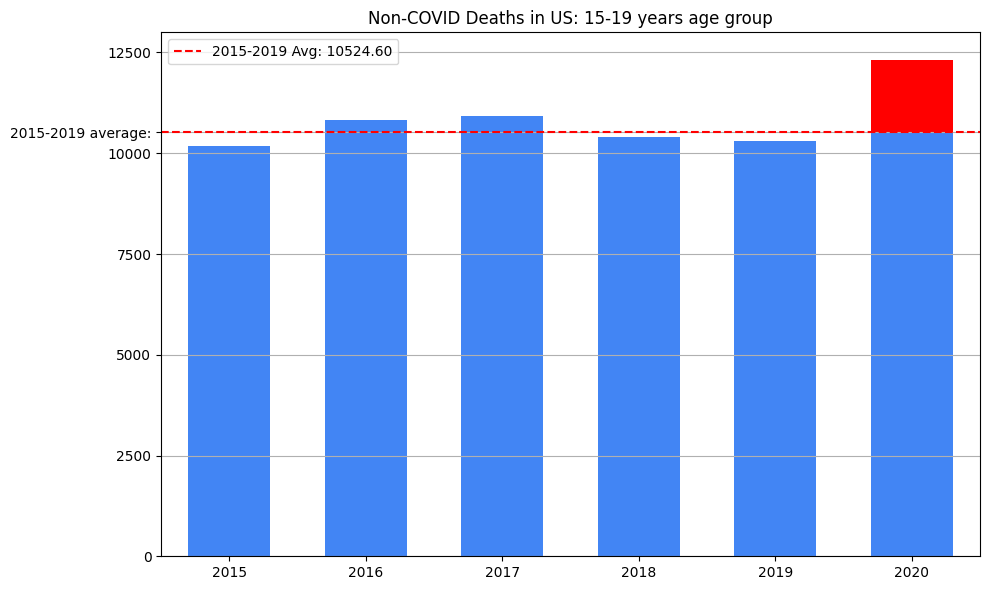

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame containing the provided columns
df = pd.read_csv('AH_Excess_Deaths_by_Sex__Age__and_Race_and_Hispanic_Origin.csv')

# Filter data for the specified AgeGroup
df = df[df['AgeGroup'] == '15-19 Years']

# Calculating non-COVID deaths by subtracting COVID-related deaths from total deaths
df['NonCOVID_Deaths_Weighted'] = df['Deaths (weighted)'] - df['COVID19 (weighted)']
df['NonCOVID_Deaths_Unweighted'] = df['Deaths (unweighted)'] - df['COVID19 (unweighted)']
df['NonCOVID_Deaths'] = (df['NonCOVID_Deaths_Weighted'] + df['NonCOVID_Deaths_Unweighted']) / 8

# Plotting histogram for Non-COVID Deaths (Weighted) and Non-COVID Deaths (Unweighted) together
plt.figure(figsize=(10, 6))
plt.grid(axis='y')

# Set the bins and weights for the histogram
bars = plt.hist(df['MMWRyear'], bins=np.arange(df['MMWRyear'].min(), df['MMWRyear'].max() + 1), weights=df['NonCOVID_Deaths'], color='#4285F4', rwidth=0.6)

# Calculate the average height of the displayed bars
average_height = np.mean([bar for i, bar in enumerate(bars[0]) if i + df['MMWRyear'].min() in [2015, 2016, 2017, 2018, 2019]])

# Plot the average line for the displayed years
plt.axhline(average_height, color='red', linestyle='--', label=f'2015-2019 Avg: {average_height:.2f}')

# Separate the 2020 bar into two parts based on the mean line
x_values, y_values = bars[1], bars[0]
index_2020 = np.where(x_values == 2020)[0][0]  # Get the index of 2020
above_mean = y_values[index_2020] - average_height  # Calculate the part of 2020 above the average line
below_mean = y_values[index_2020] - above_mean  # Calculate the part of 2020 below the average line

# Plotting the 2020 bar divided into two parts, above and below the average line
plt.bar(2020.5, above_mean, color='red', width=0.6, bottom=average_height)


plt.title('Non-COVID Deaths in US: 15-19 years age group')
plt.legend()

# Set the axis limits and labels
plt.xlim(2015, 2021)
plt.ylim(0, 13000)
xticks = [2015.5, 2016.5, 2017.5, 2018.5, 2019.5, 2020.5]
xticklabels = ['2015', '2016', '2017', '2018', '2019', '2020']
plt.xticks(xticks, xticklabels)
yticks = [0, 2500, 5000, 7500, 10000, 12500, average_height]
yticklabels = ['0', '2500', '5000', '7500', '10000', '12500', '2015-2019 average:']
plt.yticks(yticks, yticklabels)
plt.tight_layout()
plt.show()
